<a href="https://colab.research.google.com/github/samyzaf/kerutils/blob/master/geofig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IMG
src="https://samyzaf.com/ML/geofig/images/geofig1.png"
width=600
/>

**Geofig** is a large data set of simple 48x48 pixels black and white geometrical shapes.
It consists of 8 shape types:

    0: Ellipse
    1: Arc
    2: Wedge
    3: Triangle
    4: Quadrilateral
    5: Pentagon
    6: Hexagon
    7: Heptagon

They were generated by an automatic Python script with randomization on shapes.
It was designed to be as simple as possible in order to serve as a first clean example
for deep learning courses, introductory tutorials, and first course projects.
We used grayscale 48x48 pixels images,
so that it can be processed by standard pc systems with modest computing resources.

It is also intended to serve as a clear and simple minded
data set for benchmarking deep learning libraries and
deep learning hardware (like GPU systems).
As far as we tried within the **Keras** library,
achieving high accuracy prediction scores
does require a non-trivial effort and compute time.
So it does make a good challenge for tutorials and course projects for image recognition.

The **GeoFig** data set consists of 4 HDF5 files,
each contains 80,000 48x48 pixels black/white images.
So in total, we have 320,000 48x48 black/white images.
We believe that 20K images are enough for training, so you may need to download
only the first set.
But in case you need more images, you have 300K more to choose from.
All the data sets are balanced.
That is they contain equal numbers of shapes from each group.
And of course, there are no duplications! All the 320K images are unique.

1. https://samyzaf.com/ML/geofig/geofig1.h5.zip
2. https://samyzaf.com/ML/geofig/geofig2.h5.zip
3. https://samyzaf.com/ML/geofig/geofig3.h5.zip
4. https://samyzaf.com/ML/geofig/geofig4.h5.zip

You will need to install the **h5py** Python module.
Reading and writing HDF5 files can be easily learned from
the following tutorial:
https://docs.h5py.org/en/latest/quick.html

## Prerequisites
We use the
[kerutils package](https://samyzaf.com/kerutils-3.zip).

In [1]:
%pip install -q https://samyzaf.com/kerutils.zip
from kerutils import *
%matplotlib inline

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [2]:
class_name = {
    0: 'Ellipse',
    1: 'Arc',
    2: 'Wedge',
    3: 'Triangle',
    4: 'Quadrilateral',
    5: 'Pentagon',
    6: 'Hexagon',
    7: 'Heptagon',
}

nb_classes = len(class_name)   # Number of features
classes = range(nb_classes)    # List of features (as integers)

## Preparing training and validation data sets
The archived data sets above are too large for early experimentation,
so we suggest that you start with a smaller data sets first, and later increase their
size if needed.

The [**imgutils**](https://www.samyzaf.com/kerutils.zip)
module (see above) contains several utilities for manipulating HDF5 files.
The function **save_h5_from_file** can be used to extract a subset of images to an HDF5 file
from a larger HDF5.
It accepts three arguments:
1. source HDF5 pool of images
2. target HDF5 file (for saving the subset)
3. Class size: how many images in each shape class.
We have 8 shape classes, so the total number of shapes in the subset file should be
8 times larger.

In [3]:
url_get("https://samyzaf.com/ML/geofig/geofig1.h5.zip")
url_get("https://samyzaf.com/ML/geofig/geofig2.h5.zip")
save_h5_from_file("geofig1.h5", "train.h5", 1000)
save_h5_from_file("geofig2.h5", "test.h5", 200)

Downloaded geofig1.h5.zip from https://samyzaf.com/ML/geofig/geofig1.h5.zip
Extracting zip file geofig1.h5.zip ...
Done.
Downloaded geofig2.h5.zip from https://samyzaf.com/ML/geofig/geofig2.h5.zip
Extracting zip file geofig2.h5.zip ...
Done.
Total num images in file: 80000
Load progress: 100%   
Time: 38.18 seconds
Writing file: train.h5
Progress: 100%   
Time: 4.61 seconds
Total num images in file: 80000
Load progress: 100%   
Time: 35.82 seconds
Writing file: test.h5
Progress: 100%   
Time: 1.10 seconds


'test.h5'

Note that we made sure the training and validation data are disjoint (no common images) by extracting them from two different pools.

## Load training and test data
The [**imgutils**](https://samyzaf.com/kerutils.zip)
module also contains a utility **load_data**
for loading HDF5 files to memory (as Numpy arrays).
This method accepts the names of your training and validation data set files,
and it returns the following six Numpy arrays:
1. **X_train**: an array of 8000 images whose shape is 8000x48x48.
2. **y_train**: a one dimensional array of 8000 integers representing the class of each image in **X_train**.
3. **Y_train**: an 8000 array of **one-hot** vectors needed for **Keras** model.
For more details see: http://stackoverflow.com/questions/29831489/numpy-1-hot-array
4. **X_test**: an array of 1000 validation images (1000x48x48)
5. **y_test**: validation class array
6. **Y_test**: one-hot vectors for the validation samples

It should be noted that in addition to reading the images
from the HDF5 file,
the **load_data** method also performs some normalization
of the image data like scaling it to a unit interval
and centering it around the mean value.
You can control these actions by additional optional options
of this command.
Please look at the
[source code](https://samyzaf.com/kerutils.zip)
to learn more.

In [4]:
X_train, y_train, Y_train, X_test, y_test, Y_test = load_data('train.h5', 'test.h5', verbode=True)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'training samples')
print(X_test.shape[0], 'validation samples')

Loading training data set: train.h5
Total num images in file: 8001
Load progress: 100%   
Time: 6.61 seconds
Loading validation data set: test.h5
Total num images in file: 1601
Load progress: 100%   
Time: 1.03 seconds
8000 training samples
1600 validation samples
Image shape: (48, 48, 1)
X_train shape: (8000, 48, 48, 1)
8000 training samples
1600 validation samples


Let's also write two small utilities for drawing samples of images,
so we can inspect our results visually.

In [5]:
plt.rcParams['figure.figsize'] = (2,2)
def draw_image(img, id):
    img = img.reshape(48,48)
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("%d: %s" % (id, class_name[id]), fontsize=14, fontweight='bold', y=1.08)
    plt.axis('off')
    plt.show()

Let's draw image 18 in the **X_train** array as example

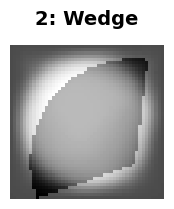

In [6]:
draw_image(X_train[18], y_train[18])

As we can see, the image is a bit blurry due to the normalization procedures that the **load_data** method has done to the original data.
If you want to draw the raw data as it is in the HDF5 file, use the **h5_get**
method to extract the raw image from the HDF5 file directly:

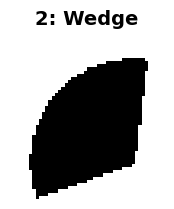

In [7]:
img = h5_get('train.h5', 'img_19') # images in h5 files are numbered from 1
id = y_train[18]
draw_image(img, id)

Sometimes we want to inspect a larger group of images in parallel, so we also provide a method
for drawing a grid of consecutive images.

In [8]:
plt.rcParams['figure.figsize'] = (8,5)
def draw_sample(X, y, n, rows=4, cols=4, imfile=None, fontsize=9):
    for i in range(0, rows*cols):
        plt.subplot(rows, cols, i+1)
        img = X[n+i].reshape(48,48)
        plt.imshow(img, cmap='gray', interpolation='none')
        id = y[n+i]
        plt.title("%d: %s" % (id, class_name[id]), fontsize=fontsize, y=1.08)
        plt.axis('off')
        plt.subplots_adjust(wspace=0.8, hspace=0.1)

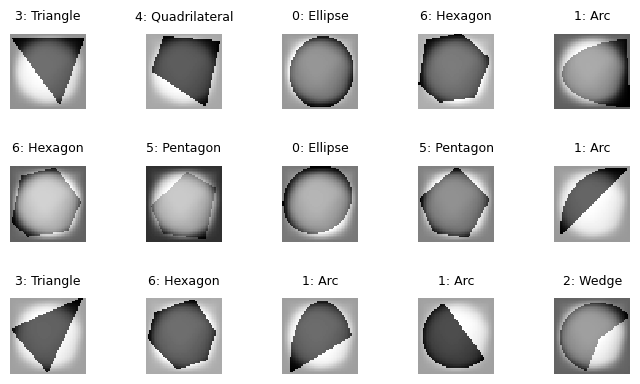

In [9]:
draw_sample(X_train, y_train, 400, 3, 5)

# Building A Neural Network for GeoFig
We will start with a simple Keras model which combines one Convolution2D layer with two Dense layers.
Although simple in terms of code, it is too expensive in terms of computation and hardware, as it contains 70 million parameters!
This is way too much and should be avoided in general.
However, we want to experiment with the common use of **Dense layers** and see why they are not
good for image processing. In general, **Dense layers** should be avoided as much as possible when dealing with image data. The general practice is to use **Convolution** and **Pooling** layers.
These two types of layers are explained in more detail in the following two articles,
which we recommend to read before you approach the following code:
1. http://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf
2. http://cs231n.github.io/convolutional-networks/

## Lets Train Model 1
We now define our first model for the recognizing **GeoFig** shapes.
Note that unlike the common practice, we decided to use the **SReLU** activation method
instead of the more popular **relu** activation.
We did several test with **relu** but **SReLU** seems to be more appropriate for **GeoFig**.
One of the amazing facts about **SReLU** is that it adapts itself during the
learning process and not a constant function as other activations.
You may read more about it in the following papers:
1. https://arxiv.org/abs/1512.07030
2. https://arxiv.org/pdf/1512.07030.pdf

In [10]:
epochs = 100
batch_size = 64
input_shape = X_train.shape[1:]

model = Sequential(name="model_1")
model.add(Convolution2D(64, 3, 3, input_shape=input_shape))
model.add(ReLU())

model.add(Flatten())

model.add(Dense(512))
model.add(ReLU())
model.add(Dropout(0.4))

model.add(Dense(256))
model.add(ReLU())
model.add(Dropout(0.4))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

print(model.summary())
save_model_summary(model, "model_1_summary.txt")
write_file("model_1.json", model.to_json())
fmon = FitMonitor(thresh=0.09, minacc=0.999, filename="model_1_autosave.h5")

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(
    X_train,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    validation_data=(X_test, Y_test),
    verbose=1,
    #callbacks = [fmon]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 16, 16, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │           2,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,523,144 (32.51 MB)

 Trainable params: 8,523,144 (32.51 MB)

 Non-trainable params: 0 (0.00 B)

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 16, 16, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │           2,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,523,144 (32.51 MB)

 Trainable params: 8,523,144 (32.51 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.3918 - loss: 1.5992 - val_accuracy: 0.7094 - val_loss: 0.7655
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7315 - loss: 0.7356 - val_accuracy: 0.8319 - val_loss: 0.4657
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8329 - loss: 0.4680 - val_accuracy: 0.8581 - val_loss: 0.4129
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8751 - loss: 0.3485 - val_accuracy: 0.8831 - val_loss: 0.3466
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9015 - loss: 0.2714 - val_accuracy: 0.8906 - val_loss: 0.3132
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9232 - loss: 0.2083 - val_accuracy: 0.8906 - val_loss: 0.3058
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9348 - loss: 0.1871 - val_accuracy: 0.9031 - val_loss: 0.3022
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9443 - loss: 0.1578 - va

Saving model to: model_1.keras
Training: accuracy   = 1.000000 loss = 0.000302
Validation: accuracy = 0.895625 loss = 0.950666
Over fitting score   = 0.094640
Under fitting score  = 0.087741
Params count: 8523144
stop epoch = 99
epochs = 100


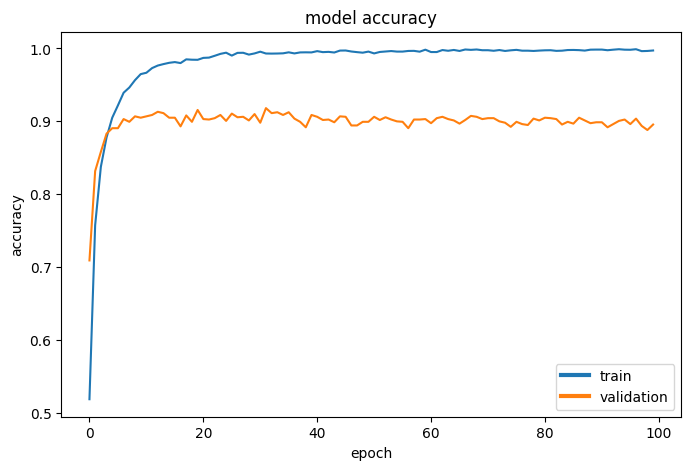

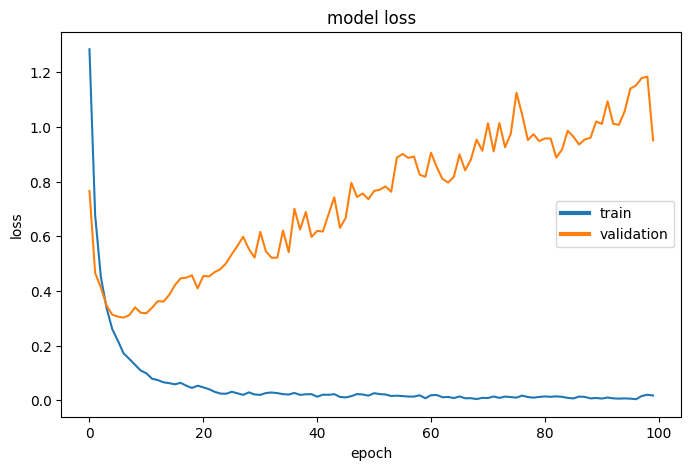

In [11]:
model_file = "model_1.keras"
print("Saving model to:", model_file)
model.save(model_file)
plot_model(model, to_file="model_1_scheme.png", show_layer_names=False, show_shapes=True)

show_scores(model, hist, X_train, Y_train, X_test, Y_test)

In [12]:
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy = 1.000000  ;  loss = 0.000302


In [13]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("Validation: accuracy1 = %f  ;  loss1 = %f" % (accuracy, loss))

Validation: accuracy1 = 0.895625  ;  loss1 = 0.950666


Although the training accuracy is quite high (99.82% !), the overall result is not good.
The 10% gap with the validation accuracy is an indication of overfitting
(which is also clearly noticeable from the accuracy and loss graphs above).
Our model is successful on the training set only and is no as successful for any other data.

## Inspecting the output

Befor we search for a new model, let's take a quick look on some of the cases that our model missed.
It may give us clues on the strengths and weaknesses of NN models, and what we can expect
from these artificial models.

The **predict_classes** method is helpful for getting a vector (**y_pred**)
of the predicted classes of **model1**.
We should compare **y_pred** to the expected true classes **y_test** in order to get
the false cases:

In [14]:
#y_pred = model.predict_classes(X_test)
x_pred = model.predict(X_test)
y_pred = np.argmax(x_pred, axis=1)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [15]:
true_preds = [(x,y) for (x,y,p) in zip(X_test, y_test, y_pred) if y == p]
false_preds = [(x,y,p) for (x,y,p) in zip(X_test, y_test, y_pred) if y != p]
print("Number of valid predictions: ", len(true_preds))
print("Number of invalid predictions:", len(false_preds))

Number of valid predictions:  1433
Number of invalid predictions: 167


The array **false_preds** consists of all triples **(x,y,p)** where **x** is an image,
**y** is its true class, and **p** is the false predicted value of **model**.

Lets visualize a sample of 15 items:

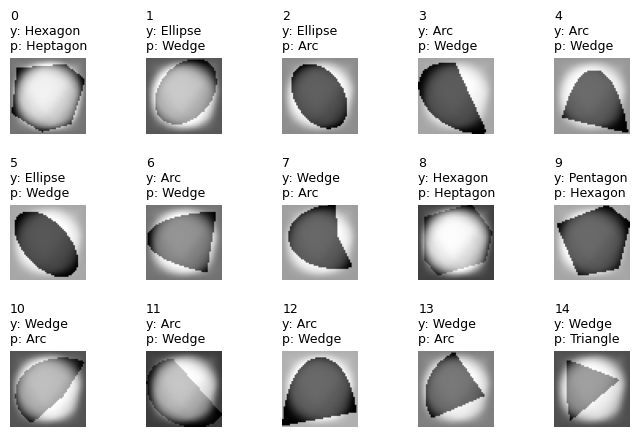

In [16]:
for i,(x,y,p) in enumerate(false_preds[0:15]):
    plt.subplot(3, 5, i+1)
    img = x.reshape(48,48)
    plt.imshow(img, cmap='gray')
    plt.title("%d\ny: %s\np: %s" % (i, class_name[y], class_name[p]), fontsize=9, loc='left')
    plt.axis('off')
    plt.subplots_adjust(wspace=0.8, hspace=0.6)

We see that our model sometimes confuses between a **Wedge** and an **Arc** in case that the Wedge angle is close to $180^\circ$ degrees.
We see this in examples 3, 8, and possibly 4
(although in example 4 the angle is not so close to $180^\circ$).
Sometimes when the Arc angle is very small, the model thinks it's an ellipse
(like in examples 0 and 13).
The confusion between a Heptagon and a Hexagon can also be understood likewise,
but in all other cases there is no such explanation for the model error.
Obviously we need to work harder for a better model.
Could be that our training set is too small (only 8000 samples) but most probably we
need to use more convolution layers.

## Second Keras Model for GeoFig database
Lets try to add an additional Convolution2D layer and reduce the width of the Dense layers.
The number of parameters is still too high (32 millions), but much less than model 1.


In [17]:
epochs = 100
batch_size = 64
input_shape = X_train.shape[1:]

model = Sequential(name="model_2")
model.add(Convolution2D(64, 3, 3, input_shape=input_shape))
model.add(ReLU())

model.add(Convolution2D(64, 3, 3, input_shape=input_shape))
model.add(ReLU())

model.add(Flatten())

model.add(Dense(256))
model.add(ReLU())
model.add(Dropout(0.4))

model.add(Dense(64))
model.add(ReLU())
model.add(Dropout(0.4))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

print(model.summary())
save_model_summary(model, "model_2_summary.txt")
write_file("model_2.json", model.to_json())
fmon = FitMonitor(thresh=0.09, minacc=0.999, filename="model_2_autosave.h5")

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(
    X_train,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    validation_data=(X_test, Y_test),
    verbose=1,
    #callbacks = [fmon]
)

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 5, 5, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_6 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 464,392 (1.77 MB)

 Trainable params: 464,392 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 5, 5, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_6 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 464,392 (1.77 MB)

 Trainable params: 464,392 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.2912 - loss: 1.8131 - val_accuracy: 0.6413 - val_loss: 0.9817
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6224 - loss: 1.0231 - val_accuracy: 0.8106 - val_loss: 0.5685
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7608 - loss: 0.6656 - val_accuracy: 0.8444 - val_loss: 0.4122
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8304 - loss: 0.4798 - val_accuracy: 0.8913 - val_loss: 0.3087
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8591 - loss: 0.4001 - val_accuracy: 0.9013 - val_loss: 0.2730
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8711 - loss: 0.3501 - val_accuracy: 0.9125 - val_loss: 0.2431
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8817 - loss: 0.3246 - val_accuracy: 0.9162 - val_loss: 0.2232
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8961 - loss: 0.2898 - val

Saving model to: model_2.keras
Training: accuracy   = 0.999250 loss = 0.002189
Validation: accuracy = 0.948125 loss = 0.294392
Over fitting score   = 0.033178
Under fitting score  = 0.031523
Params count: 464392
stop epoch = 99
epochs = 100


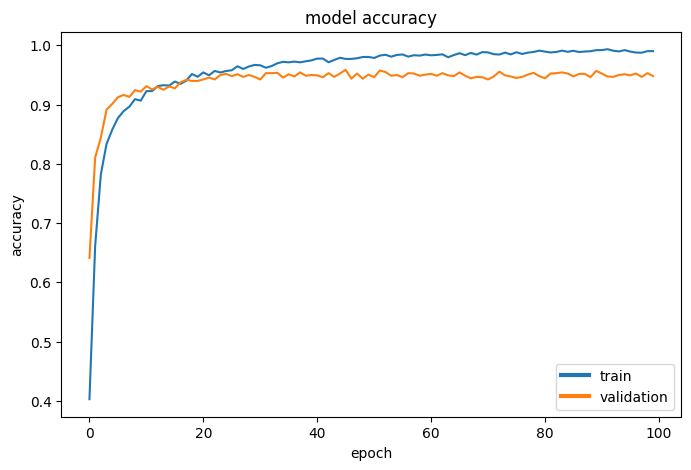

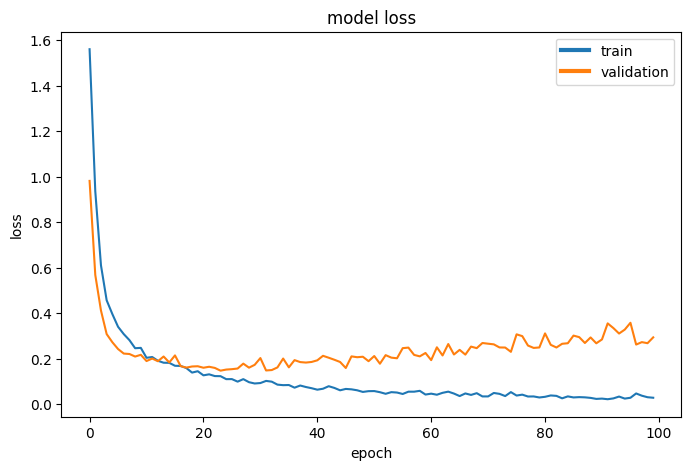

In [18]:
model_file = "model_2.keras"
print("Saving model to:", model_file)
model.save(model_file)
plot_model(model, to_file="model_2_scheme.png", show_layer_names=False, show_shapes=True)

show_scores(model, hist, X_train, Y_train, X_test, Y_test)

Seems like the second Convolution layer that we added has reduced overfitting by almost 4%, but this is not good enough yet. The clear gap between the training and validation loss graph indicates that there's more room for improvement.

## Validation Credibility
Before proceeding to our third model, let's take a moment
for discussing one more issue.
From the two models above, we learn that training accuracy
can be quite high (99.82% in model 1, and 99.95% in model 2),
but we should not be impressed as we fall short in
our validation sets.
In some cases however we might be satisfied with what we
got but would like to carry out further tests to make sure
that the validation accuracy we have is not volatile.
After all our validation set ("test.h5") has
only 1600 samples, which might not be enough to
trust in general.

Our  [**imgutils**](https://samyzaf.com/kerutils.zip)
contains a special method **check_data_set** for testing
our model on as many samples as we wish
from our large repository of samples (320K samples!).
This method accepts three arguments:
1. Keras model object
2. HDF5 file of GeoFig images
3. Number of images to sample

You may want to sample a few thousand images
from each repository in order to gain confidence in your model.
here are two examples of using this method which show that the validation accuracy we got
is trustable:

In [19]:
url3 = "https://samyzaf.com/ML/geofig/geofig3.h5.zip"
url4 = "https://samyzaf.com/ML/geofig/geofig4.h5.zip"
url_get(url3)
url_get(url4)

Downloaded geofig3.h5.zip from https://samyzaf.com/ML/geofig/geofig3.h5.zip
Extracting zip file geofig3.h5.zip ...
Done.
Downloaded geofig4.h5.zip from https://samyzaf.com/ML/geofig/geofig4.h5.zip
Extracting zip file geofig4.h5.zip ...
Done.


'geofig4.h5'

In [20]:
check_data_set(model, "geofig4.h5", sample=5000)

Total num images in file: 80000
Sampling 5000 images from 80000
Load progress: 100%   
Time: 2.90 seconds
Loaded 5000 images
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9464 - loss: 0.3296
Data shape: (5000, 48, 48, 1)
accuracy   = 0.947400 loss = 0.306179


(0.9473999738693237, 0.3061787784099579)

In [21]:
check_data_set(model, "geofig3.h5", sample=10000)

Total num images in file: 80000
Sampling 10000 images from 80000
Load progress: 100%   
Time: 5.57 seconds
Loaded 10000 images
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9529 - loss: 0.2446
Data shape: (10000, 48, 48, 1)
accuracy   = 0.952900 loss = 0.260069


(0.9528999924659729, 0.2600688934326172)

## Model 3
We will add a third Convolution layer, and increase the filter size to 5x5 in the first two layers.
In adition, we add three new **MaxPooling2D** layers (one after each **Convolution2D**).
The immediate effect of these layers is a drastic reduction in the model number of parameters
from 90 million to 915K almost 1% of the size of model 1.
Even if we get similar results to model 1, it would be considered a success and a proof for
why Convolution and Pooling layers are the right kind of layers to use for image data.

In [22]:
epochs = 100
batch_size = 64
input_shape = X_train.shape[1:]

model = Sequential(name="model_3")
model.add(Convolution2D(64, 5, 5, input_shape=input_shape, padding='same'))
model.add(ReLU())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 5, 5, input_shape=input_shape, padding='same'))
model.add(ReLU())

model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Convolution2D(64, 3, 3, input_shape=input_shape, padding='same'))
model.add(ReLU())

model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())

model.add(Dense(256))
model.add(ReLU())
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(ReLU())
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

print(model.summary())
save_model_summary(model, "model_3_summary.txt")
write_file("model_3.json", model.to_json())
fmon = FitMonitor(thresh=0.09, minacc=0.999, filename="model_3_autosave.h5")

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(
    X_train,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    validation_data=(X_test, Y_test),
    verbose=1,
    #callbacks = [fmon]
)

Model: "model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_7 (ReLU)                       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 1, 1, 64)            │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_8 (ReLU)                       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 1, 1, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_9 (ReLU)                       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_10 (ReLU)                      │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_11 (ReLU)                      │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │           1,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 191,624 (748.53 KB)

 Trainable params: 191,624 (748.53 KB)

 Non-trainable params: 0 (0.00 B)

Model: "model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_7 (ReLU)                       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 1, 1, 64)            │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_8 (ReLU)                       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 1, 1, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_9 (ReLU)                       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_10 (ReLU)                      │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_11 (ReLU)                      │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │           1,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 191,624 (748.53 KB)

 Trainable params: 191,624 (748.53 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.2293 - loss: 1.9058 - val_accuracy: 0.5550 - val_loss: 1.1579
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5300 - loss: 1.1740 - val_accuracy: 0.6344 - val_loss: 0.8939
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6313 - loss: 0.9191 - val_accuracy: 0.7000 - val_loss: 0.7270
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7056 - loss: 0.7359 - val_accuracy: 0.7956 - val_loss: 0.5425
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8021 - loss: 0.5408 - val_accuracy: 0.8069 - val_loss: 0.4872
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8389 - loss: 0.4256 - val_accuracy: 0.8725 - val_loss: 0.3621
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8672 - loss: 0.3529 - val_accuracy: 0.8831 - val_loss: 0.3264
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8926 - loss: 0.2880 - va

Saving model to: model_3.keras
Training: accuracy   = 0.999875 loss = 0.001018
Validation: accuracy = 0.941250 loss = 0.443360
Over fitting score   = 0.058971
Under fitting score  = 0.054255
Params count: 191624
stop epoch = 99
epochs = 100


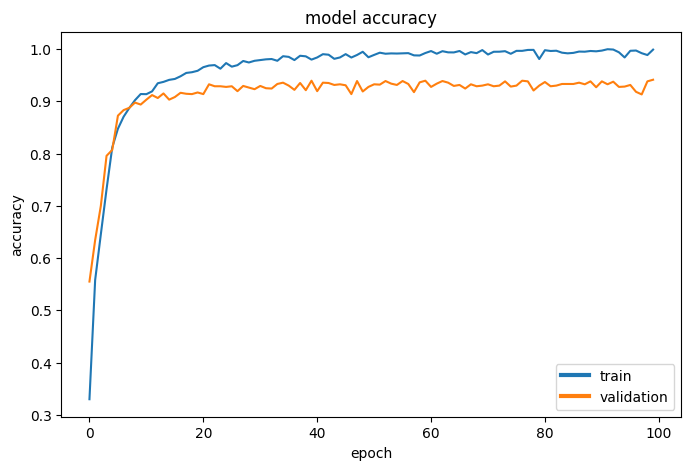

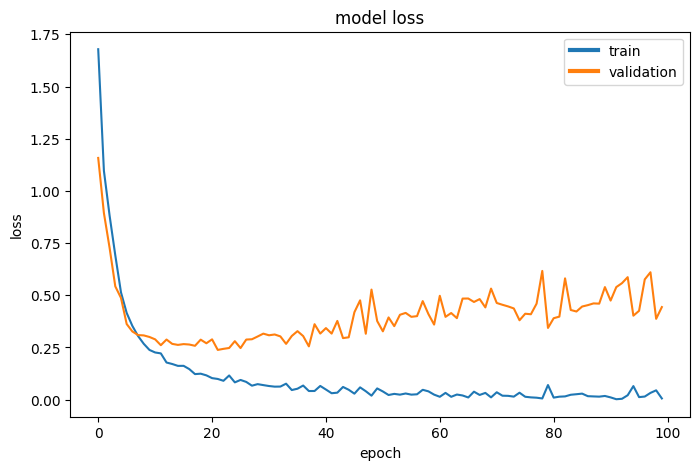

In [23]:
model_file = "model_3.keras"
print("Saving model to:", model_file)
model.save(model_file)
plot_model(model, to_file="model_3_scheme.png", show_layer_names=False, show_shapes=True)
show_scores(model, hist, X_train, Y_train, X_test, Y_test)

In [24]:
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy = 0.999875  ;  loss = 0.001018


In [25]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Validation: accuracy = 0.941250  ;  loss = 0.443360


This is getting better.
Using convolution and pooling layers has enabled better
validation accuracy
(the gap has dropped to less than 3.5%).
And let us mention again that our model parameters has dropped
from 90M to 900K!
So by all means this looks like a giant step forward.
We will stop our experiments here and let you try to
do better (good luck ;-).
Is it possible to achieve 100% accuracy???
And if so, in what cost?
We don't want too many parameters (not a fare game!),
and we don't want too many layers and nuerons.
After all we are dealing with a rather simple image database
(simplest geometrical figures),
and we want to replace old school programmers with
neural networks ... :-)

You may enlarge your training and validation sets.
We used only 8000 training samples.
How about using 32000 training samples?
You may also experiment with other activation functions
and optimizers
(there are plenty of them in **Keras**).

Before you proceed, lets take a look at some examples in
which model 3 fails:

In [26]:
x_pred = model.predict(X_test)
y_pred = np.argmax(x_pred, axis=1)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [27]:
true_preds = [(x,y) for (x,y,p) in zip(X_test, y_test, y_pred) if y == p]
false_preds = [(x,y,p) for (x,y,p) in zip(X_test, y_test, y_pred) if y != p]
print("Number of valid predictions: ", len(true_preds))
print("Number of invalid predictions:", len(false_preds))

Number of valid predictions:  1506
Number of invalid predictions: 94


Let's draw the first 15 failures

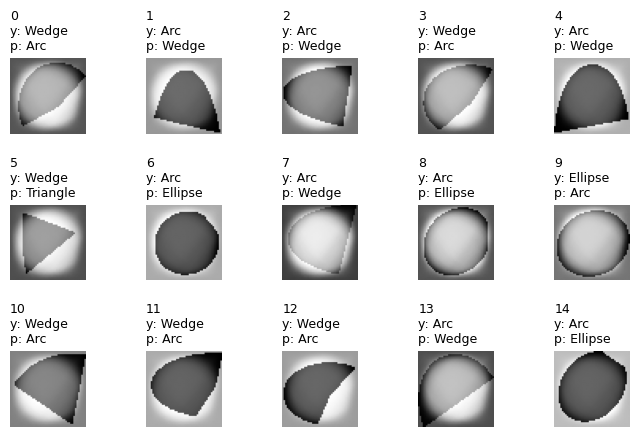

In [28]:
for i,(x,y,p) in enumerate(false_preds[0:15]):
    plt.subplot(3, 5, i+1)
    img = x.reshape(48,48)
    plt.imshow(img, cmap='gray')
    plt.title("%d\ny: %s\np: %s" % (i, class_name[y], class_name[p]), fontsize=9, loc='left')
    plt.axis('off')
    plt.subplots_adjust(wspace=0.8, hspace=0.6)

## Model 4
We will add a third Convolution layer, and increase the filter size to 5x5 in the first two layers.
In adition, we add three new **MaxPooling2D** layers
(one after each **Convolution2D**).
The immediate effect of these layers is a drastic reduction in
the model number of parameters
from 90 million to 915K almost 1% of the size of model 1.
Even if we get similar results to model 1, it would be considered a success and a proof for
why Convolution and Pooling layers are the right kind of layers to use for image data.

## **Note**
After replacing the old **SReLU** (not clear why was removed!?),
and trying to replace it with **PReLU**,
this code failed and need some fixing ... :-(
To be done at a later stage ....

In [29]:
#!pip install keras-contrib
#!pip install git+https://www.github.com/keras-team/keras-contrib.git
#from keras_contrib.layers import SReLU
sr = Activation(PReLU())
#from tensorflow.keras.layers import ELU
epochs = 100
batch_size = 64
input_shape = X_train.shape[1:]

model = Sequential(name="model_3")
model.add(Convolution2D(64, 5, 5, input_shape=input_shape, padding='same'))
model.add(sr)

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 5, 5, input_shape=input_shape, padding='same'))
model.add(sr)

model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Convolution2D(64, 3, 3, input_shape=input_shape, padding='same'))
model.add(sr)

model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())

model.add(Dense(256))
model.add(sr)
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(sr)
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

print(model.summary())
save_model_summary(model, "model_3_summary.txt")
#write_file("model_3.json", model.to_json())
#fmon = FitMonitor(thresh=0.09, minacc=0.999, filename="model_3_autosave.h5")

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(
    X_train,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    validation_data=(X_test, Y_test),
    verbose=1,
    #callbacks = [fmon]
)

Model: "model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 10, 10, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │           6,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 1, 1, 64)            │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │           6,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 1, 1, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │           6,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │           6,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │           6,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 8)                   │           1,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198,024 (773.53 KB)

 Trainable params: 198,024 (773.53 KB)

 Non-trainable params: 0 (0.00 B)

Model: "model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 10, 10, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │           6,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 1, 1, 64)            │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │           6,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 1, 1, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │           6,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │           6,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │           6,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 8)                   │           1,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198,024 (773.53 KB)

 Trainable params: 198,024 (773.53 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100


ValueError: Exception encountered when calling PReLU.call().

[1mDimensions must be equal, but are 10 and 2 for '{{node model_3_1/activation_3_5/p_re_lu_1/mul}} = Mul[T=DT_FLOAT](model_3_1/activation_3_5/p_re_lu_1/Neg, model_3_1/activation_3_5/p_re_lu_1/Relu_1)' with input shapes: [10,10,64], [64,2,2,64].[0m

Arguments received by PReLU.call():
  • inputs=tf.Tensor(shape=(64, 2, 2, 64), dtype=float32)

We now see more of the Arc/Wedge and Arc/Ellipse failures and less of the Hexagon/Heptagon failures.
Due to the low 48x48 pixels resolution we may not be able to achieve 100% recognition accuracy?
In example 12 above, even a trained human eye can hardly tell if this figure is an Arc or a Wedge?
So this figure should be labeled as both an Arc and a a Wedge?
or should we eliminate such case from the GeoFig database? To